# Logistic Regression

## Importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
pyspark_df = spark.table("sd_bdc_demo.default.1_am_workday_raw_data")
pyspark_df.display()

Current_Role,Zip_Code,Employee_ID,Employee_Annual_Salary,Monthly_Medical_contribution,Monthly_Dental_Contribution,Monthly_Vision_Contribution,Bonus,Years_Of_Service,Department,Gender,Employee_HR_rate,Hours_per_week,Years_Since_Last_Promotion,age,left
Senior Software Engineer,94103,57,130800,130,35,19,13865,5.2,Engineering,Male,60,40,2.806297057,34,0
Associate Data Scientist,94111,58,74250,105,30,17,4344,1.7,Data Science,Non-Binary,117,40,1.568788501,29,0
Associate Product Manager,10009,59,125850,130,35,19,15920,1.3,Product,Non-Binary,147,40,1.25119781,31,0
Business Analyst,60605,60,84750,105,30,17,5890,3.9,Finance,Female,153,40,2.302532512,31,0
Chief Operating Officer,2101,61,300000,230,55,27,90000,15.2,Executive,Female,79,40,5.787816564,41,1
Chief Technology Officer,98102,62,300000,230,55,27,90000,14.7,Executive,Male,70,40,4.509240246,40,0
Content Strategist,60605,63,97700,105,30,17,7767,5.9,Marketing,Female,73,40,1.87816564,33,0
Content Strategist,10005,64,89300,105,30,17,5849,3.1,Marketing,Female,113,40,2.168377823,26,0
Content Writer,10005,65,89600,105,30,17,5914,3.2,Marketing,Female,93,40,2.266940452,34,0
Customer Success Manager,10002,66,129450,130,35,19,16893,2.1,Customer Support,Male,80,40,1.514031485,29,0


In [0]:
print(type(pyspark_df))

<class 'pyspark.sql.connect.dataframe.DataFrame'>


In [0]:
df = pyspark_df.toPandas()

In [0]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [0]:
print(df.columns)

Index(['Current_Role', 'Zip_Code', 'Employee_ID', 'Employee_Annual_Salary',
       'Monthly_Medical_contribution', 'Monthly_Dental_Contribution',
       'Monthly_Vision_Contribution', 'Bonus', 'Years_Of_Service',
       'Department', 'Gender', 'Employee_HR_rate', 'Hours_per_week',
       'Years_Since_Last_Promotion', 'age', 'left'],
      dtype='object')


In [0]:
print(df.head())

                Current_Role  Zip_Code  ...  age  left
0   Senior Software Engineer     94103  ...   34     0
1   Associate Data Scientist     94111  ...   29     0
2  Associate Product Manager     10009  ...   31     0
3           Business Analyst     60605  ...   31     0
4    Chief Operating Officer      2101  ...   41     1

[5 rows x 16 columns]


In [0]:
print(df.shape)

(100, 16)


## Encoding categorical data

In [0]:
df_encoded = pd.get_dummies(df, columns=['Current_Role', 'Department', 'Gender'], drop_first=False).astype(int)


In [0]:
print(df_encoded.head())

   Zip_Code  Employee_ID  ...  Gender_Male  Gender_Non-Binary
0     94103           57  ...            1                  0
1     94111           58  ...            0                  1
2     10009           59  ...            0                  1
3     60605           60  ...            0                  0
4      2101           61  ...            0                  0

[5 rows x 105 columns]


In [0]:
print(df_encoded.shape)

(100, 105)


## Removing `left` column

In [0]:
df_no_left = df_encoded.drop(columns=['left'])
X = df_no_left

In [0]:
print(X.head())


   Zip_Code  Employee_ID  ...  Gender_Male  Gender_Non-Binary
0     94103           57  ...            1                  0
1     94111           58  ...            0                  1
2     10009           59  ...            0                  1
3     60605           60  ...            0                  0
4      2101           61  ...            0                  0

[5 rows x 104 columns]


In [0]:
print(X.shape)

(100, 104)


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# List of columns to scale
columns_to_scale = [
    'Employee_Annual_Salary', 'Monthly_Medical_contribution',
    'Monthly_Dental_Contribution', 'Monthly_Vision_Contribution', 'Bonus',
    'Years_Of_Service', 'Employee_HR_rate', 'Hours_per_week',
    'Years_Since_Last_Promotion', 'age'
]

# Fit sc on training data and transform both training and test sets
X_scaled = X.copy()

X_scaled[columns_to_scale] = sc.fit_transform(X_scaled[columns_to_scale])


In [0]:
print(X_scaled)

    Zip_Code  Employee_ID  ...  Gender_Male  Gender_Non-Binary
0      94103           57  ...            1                  0
1      94111           58  ...            0                  1
2      10009           59  ...            0                  1
3      60605           60  ...            0                  0
4       2101           61  ...            0                  0
..       ...          ...  ...          ...                ...
95     98103          152  ...            1                  0
96     78723          153  ...            0                  0
97     78712          154  ...            1                  0
98     78703          155  ...            1                  0
99     98109          156  ...            0                  0

[100 rows x 104 columns]


In [0]:
print(X_scaled.shape)

(100, 104)


### Removing `Employee ID` & `Zip Code` in `X_scaled`

In [0]:
print(type(X_scaled))

<class 'pandas.core.frame.DataFrame'>


In [0]:
X_scaled_new = X_scaled.drop(columns=['Employee_ID', 'Zip_Code'])
print(X_scaled_new)

    Employee_Annual_Salary  ...  Gender_Non-Binary
0                 0.042182  ...                  0
1                -1.037434  ...                  1
2                -0.052320  ...                  1
3                -0.836975  ...                  0
4                 3.272440  ...                  0
..                     ...  ...                ...
95               -0.773018  ...                  0
96               -0.624106  ...                  0
97               -0.773018  ...                  0
98               -0.778746  ...                  0
99                3.272440  ...                  0

[100 rows x 102 columns]


## Using the elbow method to find the optimal number of clusters

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc4b1bd3910>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

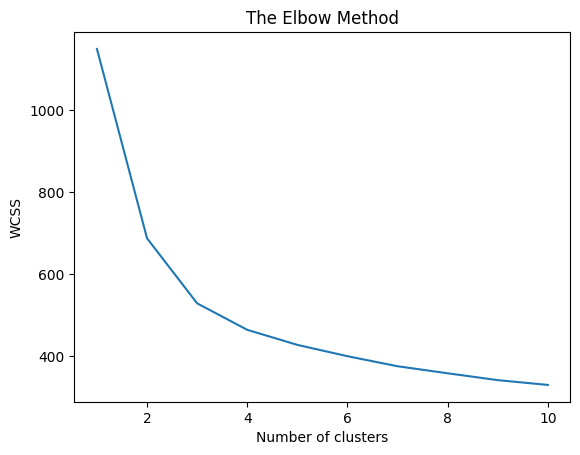

In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X_scaled_new)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc4b1c68dc0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

KMeans(n_clusters=5, random_state=42)

## Prediction

In [0]:
y_kmeans = kmeans.predict(X_scaled_new)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc4cb1d43a0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [0]:
print(y_kmeans)

[4 0 0 0 2 2 4 0 4 4 0 4 4 0 0 1 1 4 1 1 1 1 1 4 4 0 0 0 4 0 0 0 0 3 3 0 0
 4 0 0 0 0 0 3 3 3 3 3 3 3 3 0 4 4 0 4 0 0 1 1 1 1 1 4 1 3 4 3 3 1 4 3 3 3
 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 4 3 0 1 3 4 0 4 4 0 2]


In [0]:
print(len(y_kmeans))

100


### Saving the output as new table

In [0]:
df_new = df.copy()

In [0]:
df_new['Cluster_label'] = y_kmeans


In [0]:
print(df_new)

                 Current_Role  Zip_Code  Employee_ID  ...  age  left  Cluster_label
0    Senior Software Engineer     94103           57  ...   34     0              4
1    Associate Data Scientist     94111           58  ...   29     0              0
2   Associate Product Manager     10009           59  ...   31     0              0
3            Business Analyst     60605           60  ...   31     0              0
4     Chief Operating Officer      2101           61  ...   41     1              2
..                        ...       ...          ...  ...  ...   ...            ...
95           Technical Writer     98103          152  ...   28     0              0
96                UX Designer     78723          153  ...   28     0              4
97              UX Researcher     78712          154  ...   31     0              4
98              UX Researcher     78703          155  ...   24     0              0
99           VP of Technology     98109          156  ...   35     0        

In [0]:
print(df_new.shape)

(100, 17)


In [0]:
spark_df = spark.createDataFrame(df_new)

In [0]:
spark_df.write.mode("overwrite").saveAsTable("sd_bdc_demo.default.3_am_workday_pre_trained_cluster_data")

## Insights

<Axes: xlabel='Cluster_label', ylabel='age'>

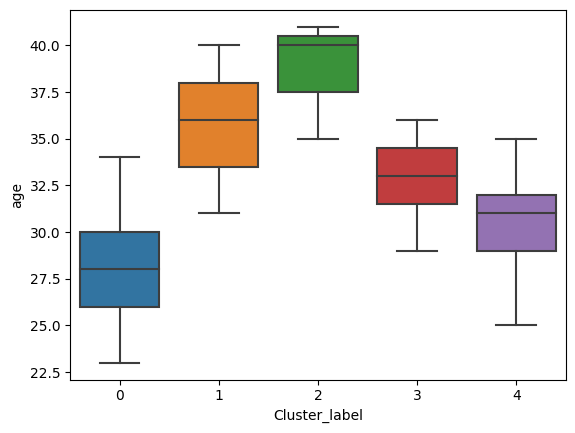

In [0]:
# Compare age distributions visually
import seaborn as sns
sns.boxplot(x='Cluster_label', y='age', data=df_new)

In [0]:
selected_cols = [
                    'Employee_Annual_Salary', 'Monthly_Medical_contribution',
                    'Monthly_Dental_Contribution', 'Monthly_Vision_Contribution', 'Bonus',
                    'Years_Of_Service', 'Employee_HR_rate', 'Hours_per_week',
                    'Years_Since_Last_Promotion', 'age', 'left'
                ]
cluster_avg = df_new.groupby('Cluster_label')[selected_cols].mean().reset_index()
print(cluster_avg)


   Cluster_label  Employee_Annual_Salary  ...        age      left
0              0            85161.666667  ...  28.133333  0.000000
1              1           201400.000000  ...  35.733333  0.400000
2              2           300000.000000  ...  38.666667  0.333333
3              3           140230.645161  ...  32.967742  0.129032
4              4            96954.761905  ...  30.571429  0.000000

[5 rows x 12 columns]


In [0]:
print(type(cluster_avg))

<class 'pandas.core.frame.DataFrame'>


### Saving the insights as new table

In [0]:
spark_df = spark.createDataFrame(cluster_avg)

In [0]:
spark_df.write.mode("overwrite").saveAsTable("sd_bdc_demo.default.2_am_workday_kmean_insights")